In [1]:
# Imports
%matplotlib inline

import xgboost as xgb
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.5)

### Load data<a name='data' />

In [2]:
dtrain = xgb.DMatrix('./data/agaricus.txt.train')
dtest = xgb.DMatrix('./data/agaricus.txt.test')

### Train

In [3]:
# specify training parameters
params = {
    'objective':'binary:logistic',
    'max_depth':1,
    'silent':1,
    'eta':0.5
}

num_rounds = 5

In [4]:
# Check performance
watchlist  = [(dtest,'test'), (dtrain,'train')] # native interface only
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.11049	train-error:0.113926
[1]	test-error:0.11049	train-error:0.113926
[2]	test-error:0.03352	train-error:0.030401
[3]	test-error:0.027312	train-error:0.021495
[4]	test-error:0.031037	train-error:0.025487


### Representation of a tree<a name='tree' />

In [5]:
trees_dump = bst.get_dump(fmap='./data/featmap.txt', with_stats=True)

for tree in trees_dump:
    print(tree)

0:[odor=pungent] yes=2,no=1,gain=4000.53101,cover=1628.25
	1:leaf=0.647757947,cover=924.5
	2:leaf=-0.933309674,cover=703.75

0:[odor=musty] yes=2,no=1,gain=1377.22437,cover=1404.203
	1:leaf=-0.339609325,cover=1008.21417
	2:leaf=0.759690285,cover=395.988831

0:[gill-size=narrow] yes=2,no=1,gain=1210.76575,cover=1232.64319
	1:leaf=0.673357666,cover=430.293335
	2:leaf=-0.36520344,cover=802.349915

0:[stalk-surface-above-ring=smooth] yes=2,no=1,gain=791.95874,cover=1111.84363
	1:leaf=-0.277528912,cover=765.906372
	2:leaf=0.632880688,cover=345.937195

0:[odor=pungent] yes=2,no=1,gain=493.703613,cover=981.6828
	1:leaf=0.275961101,cover=638.372559
	2:leaf=-0.466680348,cover=343.310272



### Plot

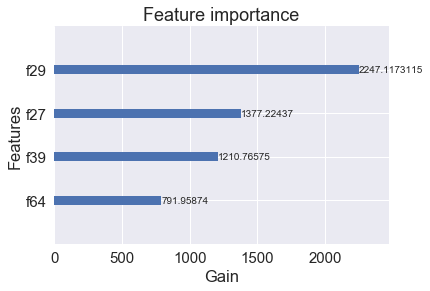

In [6]:
xgb.plot_importance(bst, importance_type='gain', xlabel='Gain')

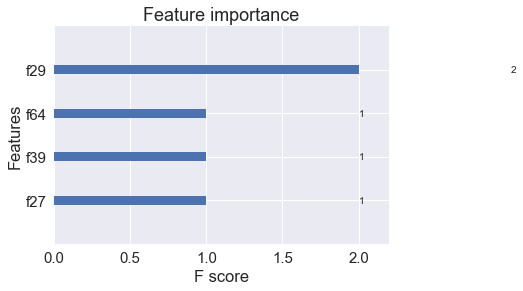

In [7]:
xgb.plot_importance(bst)

In [8]:
importances = bst.get_fscore()
importances

{'f29': 2, 'f27': 1, 'f39': 1, 'f64': 1}

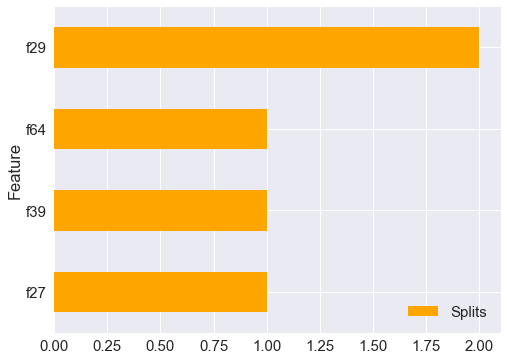

In [9]:
# Create df
importance_df = pd.DataFrame({
        'Splits': list(importances.values()),
        'Feature': list(importances.keys())
    })
importance_df.sort_values(by='Splits', inplace=True)
importance_df.plot(kind='barh', x='Feature', figsize=(8,6), color='orange')